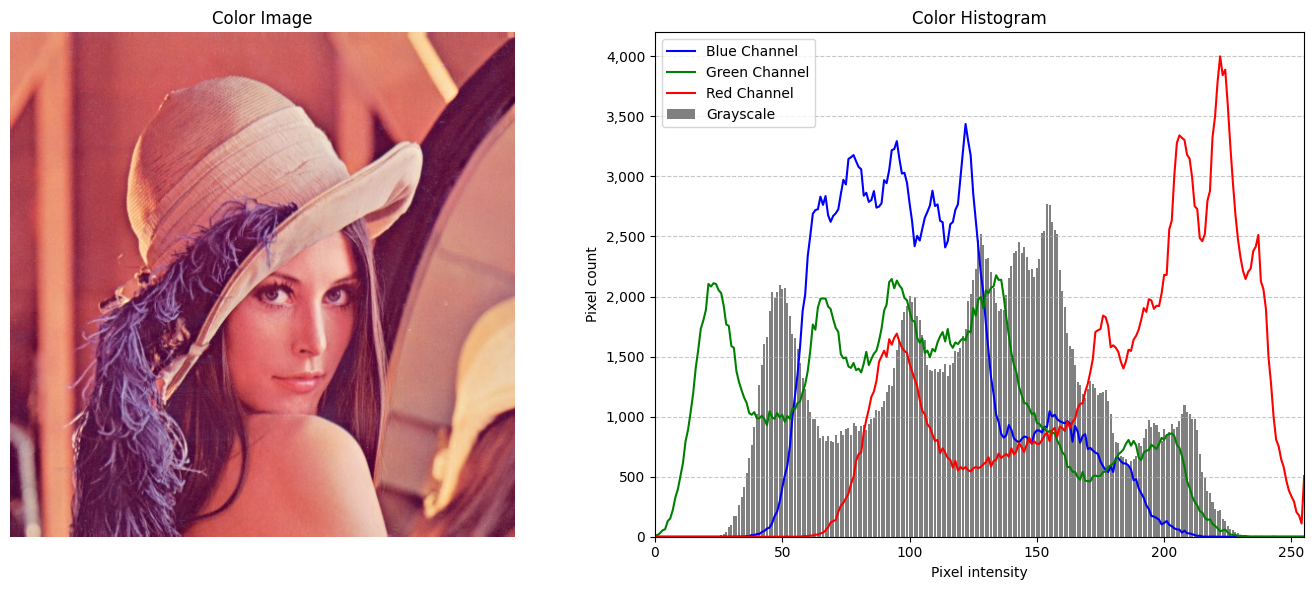

In [13]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 읽기 (컬러 이미지)
img = cv2.imread("lena.jpg")

# BGR 채널로 나누기 (OpenCV는 기본적으로 BGR 형식)
blue_channel = img[:, :, 0]
green_channel = img[:, :, 1]
red_channel = img[:, :, 2]

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 각 채널에 대해 히스토그램 계산
blue_hist = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
green_hist = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
red_hist = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
gray_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# 그래프 설정
plt.figure(figsize=(14, 6))

# 원본 컬러 이미지 표시
plt.subplot(1, 2, 1)
plt.title('Color Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환해서 표시
plt.axis('off')

# 각 채널의 히스토그램을 출력
plt.subplot(1, 2, 2)
plt.title('Color Histogram')

# BGR 채널별 히스토그램 표시
plt.bar(range(256), gray_hist.ravel(), color="gray", label='Grayscale')
plt.plot(blue_hist, color='blue', label='Blue Channel')
plt.plot(green_hist, color='green', label='Green Channel')
plt.plot(red_hist, color='red', label='Red Channel')

# x축, y축 설정
plt.xlabel('Pixel intensity')
plt.ylabel('Pixel count')
plt.xlim([0, 255])  # x축 범위 설정
plt.legend()

# y축 tick 포매팅
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()